# Salary Predict with Nonlinear Regression Models in Hitters Dataset

This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University. This is part of the data that was used in the 1988 ASA Graphics Section Poster Session. The salary data were originally from Sports Illustrated, April 20, 1987. The 1986 and career statistics were obtained from The 1987 Baseball Encyclopedia Update published by Collier Books, Macmillan Publishing Company, New York.

**Nonlinear Regression Models:**
- **KNN**
- **Support Vector Regression (SVR)**
- **CART**
- **Random Forests (RF)**
- **Gradient Boosting Machines (GBM)**
- **eXtreme Gradient Boosting (XGBoost)**
- **LightGBM**
- **CatBoost**
- **Neural Networks**


- A data frame with 322 observations of major league players on the following 20 variables.
- AtBat Number of times at bat in 1986
- Hits Number of hits in 1986
- HmRun Number of home runs in 1986
- Runs Number of runs in 1986
- RBI Number of runs batted in in 1986
- Walks Number of walks in 1986
- Years Number of years in the major leagues
- CAtBat Number of times at bat during his career
- CHits Number of hits during his career
- CHmRun Number of home runs during his career
- CRuns Number of runs during his career
- CRBI Number of runs batted in during his career
- CWalks Number of walks during his career
- League A factor with levels A and N indicating player’s league at the end of 1986
- Division A factor with levels E and W indicating player’s division at the end of 1986
- PutOuts Number of put outs in 1986
- Assists Number of assists in 1986
- Errors Number of errors in 1986
- Salary 1987 annual salary on opening day in thousands of dollars
- NewLeague A factor with levels A and N indicating player’s league at the beginning of 1987

**Number of Observation Units: 322**

**Variable Number: 20**

# 1) Exploratory Data Analysis

In [1]:
#Installation of required libraries
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
#Reading the dataset
df = pd.read_csv("../input/hitters/Hitters.csv")

In [3]:
# The first 5 observation units of the data set were accessed.
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [4]:
# The size of the data set was examined. It consists of 322 observation units and 20 variables.
df.shape

(322, 20)

In [5]:
#Feature information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [6]:
# Number of unique observations in variables
df.nunique()

AtBat        247
Hits         144
HmRun         36
Runs          96
RBI          103
Walks         89
Years         22
CAtBat       314
CHits        288
CHmRun       146
CRuns        261
CRBI         262
CWalks       248
League         2
Division       2
PutOuts      232
Assists      161
Errors        29
Salary       150
NewLeague      2
dtype: int64

In [7]:
# Because League is a categorical variable, we examined how many of the classes there are.
df["League"].value_counts()

A    175
N    147
Name: League, dtype: int64

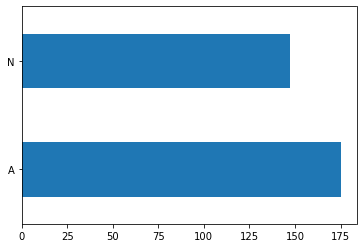

In [8]:
df.League.value_counts().plot.barh();

In [9]:
# Since NewLeague is a categorical variable, we have examined how many of the classes there are.
df["NewLeague"].value_counts()

A    176
N    146
Name: NewLeague, dtype: int64

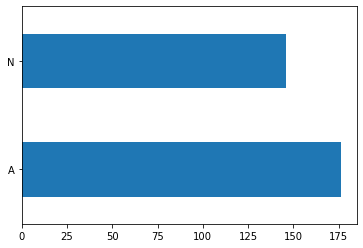

In [10]:
df.NewLeague.value_counts().plot.barh();

In [11]:
# Since Division is a categorical variable, we have examined how many of the classes there are.
df["Division"].value_counts()

W    165
E    157
Name: Division, dtype: int64

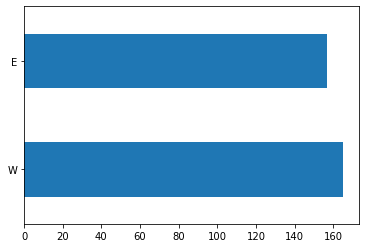

In [12]:
df.Division.value_counts().plot.barh();

In [13]:
#  The maximum value of the Salary variable has been reached. It is also our dependent variable.
df["Salary"].max()

2460.0

In [14]:
# The minimum value of the Salary variable has been reached.
df["Salary"].min()

67.5

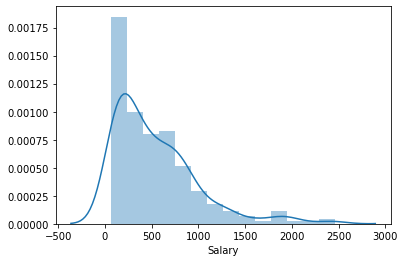

In [15]:
#Distribution of dependent variable
import seaborn as sns
sns.distplot(df.Salary);

In [16]:
# Descriptive statistics of the data set accessed.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,322.0,380.928571,153.404981,16.0,255.25,379.5,512.00,687.0
Hits,322.0,101.024845,46.454741,1.0,64.00,96.0,137.00,238.0
HmRun,322.0,10.770186,8.709037,0.0,4.00,8.0,16.00,40.0
Runs,322.0,50.909938,26.024095,0.0,30.25,48.0,69.00,130.0
RBI,322.0,48.027950,26.166895,0.0,28.00,44.0,64.75,121.0
Walks,322.0,38.742236,21.639327,0.0,22.00,35.0,53.00,105.0
Years,322.0,7.444099,4.926087,1.0,4.00,6.0,11.00,24.0
CAtBat,322.0,2648.683230,2324.205870,19.0,816.75,1928.0,3924.25,14053.0
CHits,322.0,717.571429,654.472627,4.0,209.00,508.0,1059.25,4256.0
CHmRun,322.0,69.490683,86.266061,0.0,14.00,37.5,90.00,548.0


In [17]:
# Access to the correlation of the data set was provided. What kind of relationship is examined between the variables. 
# If the correlation value is> 0, there is a positive correlation. While the value of one variable increases, the value of the other variable also increases.
# Correlation = 0 means no correlation.
# If the correlation is <0, there is a negative correlation. While one variable increases, the other variable decreases. 
# When the correlations are examined, there are 2 variables that act as a positive correlation to the Salary dependent variable.
# These variables are CRBI and CRuns. As these increase, Salary variable increases.
df.corr()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
AtBat,1.000000,0.967939,0.592198,0.913060,0.820539,0.669845,0.047372,0.235526,0.252717,0.236659,0.266534,0.244053,0.166123,0.317550,0.353824,0.352117,0.394771
Hits,0.967939,1.000000,0.562158,0.922187,0.811073,0.641211,0.044767,0.227565,0.255815,0.202712,0.261787,0.232005,0.151818,0.310673,0.320455,0.310038,0.438675
HmRun,0.592198,0.562158,1.000000,0.650988,0.855122,0.481014,0.116318,0.221882,0.220627,0.493227,0.262361,0.351979,0.233154,0.282923,-0.106329,0.039318,0.343028
Runs,0.913060,0.922187,0.650988,1.000000,0.798206,0.732213,0.004541,0.186497,0.204830,0.227913,0.250556,0.205976,0.182168,0.279347,0.220567,0.240475,0.419859
RBI,0.820539,0.811073,0.855122,0.798206,1.000000,0.615997,0.146168,0.294688,0.308201,0.441771,0.323285,0.393184,0.250914,0.343186,0.106591,0.193370,0.449457
Walks,0.669845,0.641211,0.481014,0.732213,0.615997,1.000000,0.136475,0.277175,0.280671,0.332473,0.338478,0.308631,0.424507,0.299515,0.149656,0.129382,0.443867
Years,0.047372,0.044767,0.116318,0.004541,0.146168,0.136475,1.000000,0.920289,0.903631,0.726872,0.882877,0.868812,0.838533,-0.004684,-0.080638,-0.162140,0.400657
CAtBat,0.235526,0.227565,0.221882,0.186497,0.294688,0.277175,0.920289,1.000000,0.995063,0.798836,0.983345,0.949219,0.906501,0.062283,0.002038,-0.066922,0.526135
CHits,0.252717,0.255815,0.220627,0.204830,0.308201,0.280671,0.903631,0.995063,1.000000,0.783306,0.984609,0.945141,0.890954,0.076547,-0.002523,-0.062756,0.548910
CHmRun,0.236659,0.202712,0.493227,0.227913,0.441771,0.332473,0.726872,0.798836,0.783306,1.000000,0.820243,0.929484,0.799983,0.112724,-0.158511,-0.138115,0.524931


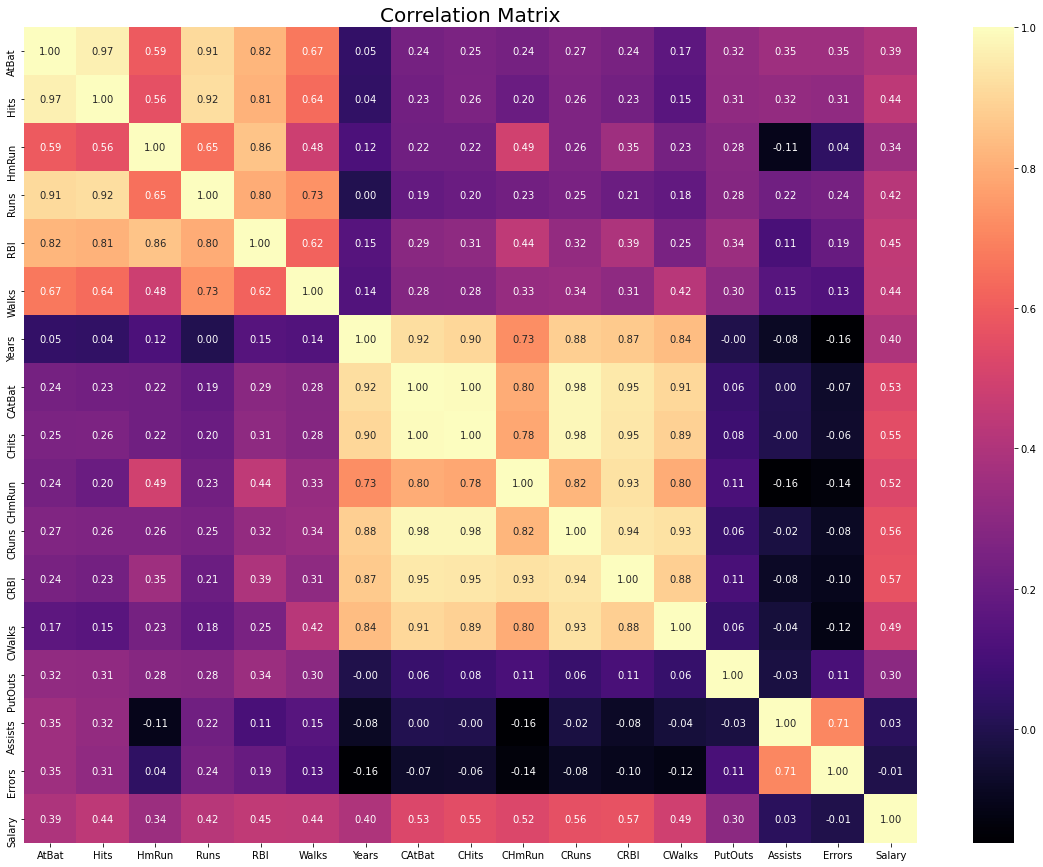

In [18]:
# Correlation matrix graph of the data set
f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [19]:
# According to the league variable, groupby is made and how much salary is taken in which league on average.
df.groupby("League").agg({"Salary": "mean"})

,Salary
League,
A,541.999547
N,529.117500


In [20]:
# In 1987, the average salary of the new leagues was examined.
df.groupby("NewLeague").agg({"Salary": "mean"})

,Salary
NewLeague,
A,537.113028
N,534.553852


In [21]:
# According to the position of the player, how much salary is on average, this is examined.
df.groupby("Division").agg({"Salary": "mean"})

,Salary
Division,
E,624.271364
W,450.876873


In [22]:
# When the correlation of the data set was examined, the CRBI variable had a positive correlation.
# As this variable increases, it should increase in Salary variable.
# Based on this, the CRBI variable is the number of innings he has made during his career.
# The mean of the Salary variable was examined by grouping it accordingly.
df.groupby("CRBI").agg({"Salary": "mean"})

,Salary
CRBI,
0,NaN
3,920.000
4,NaN
7,2127.333
9,70.000
...,...
1299,1450.000
1314,750.000
1348,500.000


In [23]:
# When the correlation of the data set was examined, the CRuns variable had a positive correlation.
# As this variable increases, it should increase in Salary variable.
# Based on this, the CRuns variable is the number of innings he has made during his career.
# The mean of the Salary variable was examined by grouping it accordingly.
df.groupby("CRuns").agg({"Salary": "mean"})

,Salary
CRuns,
1,NaN
2,920.000
3,NaN
6,2127.333
9,NaN
...,...
1172,200.000
1175,535.000
1272,NaN


In [24]:
# What is the average salary based on League and Years?
# What is the average salary the player receives, grouped by league and total career years? 
df.groupby(["League","Years"]).agg({"Salary": "mean"})

Salary
League Years             
A      1       101.944444
       2       128.055556
       3       178.615385
       4       269.423077
       5       602.147059
       6       630.441176
       7       623.500000
       8       767.395875
       9       894.000000
       10      831.468333
       11      866.666667
       12      516.428571
       13     1104.166667
       14     1019.494286
       15      563.333250
       16      480.000000
       17      686.666667
       18      509.166750
       20      487.500000
N      1       203.312500
       2       283.861083
       3       165.454545
       4       371.833333
       5       507.777778
       6       613.757545
       7       719.166643
       8       462.222333
       9       800.833286
       10      581.666667
       11      817.500000
       12      770.555667
       13     1141.392750
       14      613.333400
       15      652.777667
       16      662.500000
       17      546.666500
       18     1450.000000
       19      500.000000
       20      200.000000
       23             NaN
       24      750.000000

In [25]:
# What is the average salary based on the league he played in 1987 and the duration of his career,grouped by NewLeague and Years variables?
#  What is the average salary the player receives, grouped by new league and total career duration?
df.groupby(["NewLeague","Years"]).agg({"Salary": "mean"})

Salary
NewLeague Years             
A         1       191.388889
          2       124.722222
          3       187.250000
          4       265.178571
          5       580.078947
          6       630.441176
          7       590.416667
          8       767.395875
          9       854.000000
          10      837.762000
          11      775.000000
          12      516.428571
          13     1275.000000
          14      912.351429
          15      563.333250
          16      670.000000
          17      686.666667
          18      509.166750
          20      487.500000
N         1       102.687500
          2       286.361083
          3       157.916667
          4       383.392857
          5       540.714286
          6       613.757545
          7       741.794846
          8       462.222333
          9       829.404714
          10      612.857143
          11      896.875000
          12      770.555667
          13     1015.095167
          14      763.333400
          15      652.777667
          16      275.000000
          17      546.666500
          18     1450.000000
          19      500.000000
          20      200.000000
          23             NaN
          24      750.000000

In [26]:
# What is the average salary the players receive based on the region they play in?
df.groupby(["Division","Years"]).agg({"Salary": "mean"})

Salary
Division Years             
E        1        80.000000
         2       297.166636
         3       146.666667
         4       344.464286
         5       692.142857
         6       709.559500
         7       749.083300
         8       808.020875
         9      1050.555500
         10      820.773833
         11      616.666667
         12      620.833333
         13     1222.258875
         14     1045.486667
         15      572.777667
         16      662.500000
         17      950.000000
         18      570.555667
W        1       178.666667
         2       129.000000
         3       188.133333
         4       304.107143
         5       426.375000
         6       538.214286
         7       632.777778
         8       353.889000
         9       628.750000
         10      592.361167
         11      967.500000
         12      550.416750
         13      706.250000
         14      785.185222
         15      775.000000
         16      480.000000
         17      550.833250
         18      887.500000
         19      500.000000
         20      343.750000
         23             NaN
         24      750.000000

In [27]:
# The observation units with the highest number of hits during his career were accessed by ranking the data set in descending order.  
df.sort_values("CHits",ascending = False)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
236,237,52,0,15,25,30,24,14053,4256,160,2165,1314,1566,N,W,523,43,6,750.000,N
302,200,51,2,14,29,25,23,9778,2732,379,1272,1652,925,N,W,398,29,7,NaN,N
278,557,142,21,58,81,23,18,8759,2583,271,1138,1299,478,N,W,1160,53,7,1450.000,N
249,419,101,18,65,58,92,20,9528,2510,548,1509,1659,1342,A,W,0,0,0,487.500,A
24,629,168,18,73,102,40,18,8424,2464,164,1008,1072,402,A,E,1067,157,14,776.667,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52,19,7,0,1,2,1,4,41,13,1,3,4,4,A,E,0,0,0,NaN,A
217,20,1,0,0,0,0,2,41,9,2,6,7,4,N,E,78,220,6,2127.333,N
250,33,6,0,2,4,7,1,33,6,0,2,4,7,A,W,205,5,4,NaN,A
283,16,2,0,1,0,0,2,28,4,0,1,0,0,A,E,247,4,8,NaN,A


In [28]:
# He was grouped by leagues and reached the maximum number of hits made during his career.
df.groupby("League").agg({"CHits": "max"})

,CHits
League,
A,2510
N,4256


In [29]:
# Players are grouped according to the region they play and the maximum number of hits is reached during their career.
df.groupby("Division").agg({"CHits": "max"})

,CHits
Division,
E,2464
W,4256


In [30]:
# The maximum hit values in 1986 were reached by grouping them according to the league variable.
df.groupby("League").agg({"Hits": "max"})

,Hits
League,
A,238
N,211


In [31]:
# The maximum number of innings with a baseball bat was reached in 1986, grouped by league variable.
df.groupby("League").agg({"AtBat": "max"})

,AtBat
League,
A,687
N,642


In [32]:
# Average values of career duration were grouped according to the league variable.
df.groupby("League").agg({"Years": "mean"})

,Years
League,
A,7.657143
N,7.190476


In [33]:
# The maximum values of career duration were reached by grouping by league variable.
df.groupby("League").agg({"Years": "max"})

,Years
League,
A,20
N,24


In [34]:
# The average values of how many errors are made in which league are grouped according to the league variable.
df.groupby("League").agg({"Errors": "mean"})

,Errors
League,
A,7.582857
N,8.585034


In [35]:
# The maximum values of how many errors are made in the league are reached by grouping them according to the league variable.
df.groupby("League").agg({"Errors": "max"})

,Errors
League,
A,26
N,32


In [36]:
df.groupby("League").agg({"PutOuts": "max"})

,PutOuts
League,
A,1377
N,1378


In [37]:
# The maximum number of assists in leagues is reached by grouping them according to the league variable.
df.groupby("League").agg({"Assists": "max"})

,Assists
League,
A,482
N,492


In [38]:
df.groupby("Years").agg({"CAtBat": "max"})

,CAtBat
Years,
1,593
2,1236
3,1928
4,2020
5,2778
6,3210
7,3754
8,4071
9,4739


In [39]:
df.groupby(["League", "Years"]).agg({"CAtBat": "max"})

CAtBat
League Years        
A      1         593
       2        1038
       3        1928
       4        1716
       5        2778
       6        3210
       7        3754
       8        4071
       9        4478
       10       5624
       11       4908
       12       5511
       13       7127
       14       7287
       15       6661
       16       7099
       17       7546
       18       8424
       20       9528
N      1         549
       2        1236
       3        1399
       4        2020
       5        2703
       6        3146
       7        3358
       8        3372
       9        4739
       10       4086
       11       5628
       12       4992
       13       6090
       14       6727
       15       8068
       16       7058
       17       8247
       18       8759
       19       8396
       20       8716
       23       9778
       24      14053

In [40]:
df.groupby("League").agg({"CAtBat": "mean"})

,CAtBat
League,
A,2709.805714
N,2575.918367


# 2) Data Preprocessing

### 1) Creating New Variables

Creating new variables is important for models. But you need to create a logical new variable. This data set contains variables linked to the player's career and includes career duration. In this case **career-related variables / career duration** is done, a logical variable can be created by obtaining average values for the player. We'll be addressing that in the process below.

In [41]:
# The variables related to their careers were divided into career years and new values were created in the data set by obtaining average values.
df["OrtCAtBat"] = df["CAtBat"] / df["Years"]
df["OrtCHits"] = df["CHits"] / df["Years"]
df["OrtCHmRun"] = df["CHmRun"] / df["Years"]
df["OrtCruns"] = df["CRuns"] / df["Years"]
df["OrtCRBI"] = df["CRBI"] / df["Years"]
df["OrtCWalks"] = cwalks = df["CWalks"] / df["Years"]
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,Assists,Errors,Salary,NewLeague,OrtCAtBat,OrtCHits,OrtCHmRun,OrtCruns,OrtCRBI,OrtCWalks
0,293,66,1,30,29,14,1,293,66,1,...,33,20,NaN,A,293.000000,66.000000,1.000000,30.000000,29.000000,14.000000
1,315,81,7,24,38,39,14,3449,835,69,...,43,10,475.0,N,246.357143,59.642857,4.928571,22.928571,29.571429,26.785714
2,479,130,18,66,72,76,3,1624,457,63,...,82,14,480.0,A,541.333333,152.333333,21.000000,74.666667,88.666667,87.666667
3,496,141,20,65,78,37,11,5628,1575,225,...,11,3,500.0,N,511.636364,143.181818,20.454545,75.272727,76.181818,32.181818
4,321,87,10,39,42,30,2,396,101,12,...,40,4,91.5,N,198.000000,50.500000,6.000000,24.000000,23.000000,16.500000


In [42]:
# Based on some trials and correlation results, we subtract variables that do not contribute to the model from our data set.
df = df.drop(['AtBat','Hits','HmRun','Runs','RBI','Walks','Assists','Errors',"PutOuts",'League','NewLeague', 'Division'], axis=1)

In [43]:
# access to the first 5 observation units of the df was provided.
df.head()

,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,Salary,OrtCAtBat,OrtCHits,OrtCHmRun,OrtCruns,OrtCRBI,OrtCWalks
0,1,293,66,1,30,29,14,NaN,293.000000,66.000000,1.000000,30.000000,29.000000,14.000000
1,14,3449,835,69,321,414,375,475.0,246.357143,59.642857,4.928571,22.928571,29.571429,26.785714
2,3,1624,457,63,224,266,263,480.0,541.333333,152.333333,21.000000,74.666667,88.666667,87.666667
3,11,5628,1575,225,828,838,354,500.0,511.636364,143.181818,20.454545,75.272727,76.181818,32.181818
4,2,396,101,12,48,46,33,91.5,198.000000,50.500000,6.000000,24.000000,23.000000,16.500000


### 2) Missing Observation Analysis

In [44]:
#How many missing values?
df.isnull().sum()

Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
Salary       59
OrtCAtBat     0
OrtCHits      0
OrtCHmRun     0
OrtCruns      0
OrtCRBI       0
OrtCWalks     0
dtype: int64

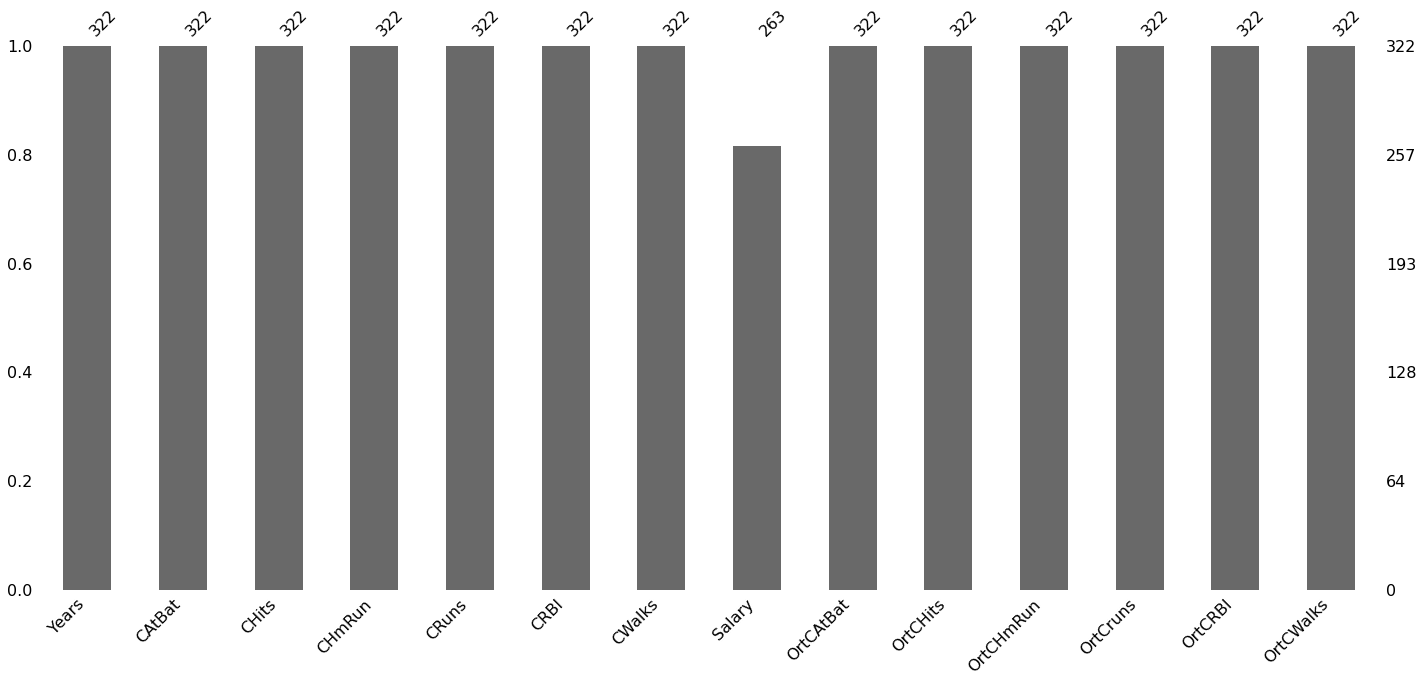

In [45]:
# Have been visualized using the missingno library for the visualization of missing observations.
import missingno as msno
msno.bar(df);

In [46]:
df_eksik = df[df["Salary"].isnull()].head()
df_eksik

,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,Salary,OrtCAtBat,OrtCHits,OrtCHmRun,OrtCruns,OrtCRBI,OrtCWalks
0,1,293,66,1,30,29,14,NaN,293.000000,66.000000,1.000000,30.000000,29.000000,14.000000
15,3,201,42,3,20,16,11,NaN,67.000000,14.000000,1.000000,6.666667,5.333333,3.666667
18,12,5233,1478,100,643,658,653,NaN,436.083333,123.166667,8.333333,53.583333,54.833333,54.416667
22,6,84,26,2,9,9,3,NaN,14.000000,4.333333,0.333333,1.500000,1.500000,0.500000
30,17,6890,1833,224,1033,864,1087,NaN,405.294118,107.823529,13.176471,60.764706,50.823529,63.941176


### 2.1) Filling of Missing Observation Units

In [47]:
#We fill in the missing observations with the KNN method.
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors = 4)
df_filled = imputer.fit_transform(df)

In [48]:
df = pd.DataFrame(df_filled,columns = df.columns)
df.isnull().sum()

Years        0
CAtBat       0
CHits        0
CHmRun       0
CRuns        0
CRBI         0
CWalks       0
Salary       0
OrtCAtBat    0
OrtCHits     0
OrtCHmRun    0
OrtCruns     0
OrtCRBI      0
OrtCWalks    0
dtype: int64

### 3) Outlier Observation Analysis

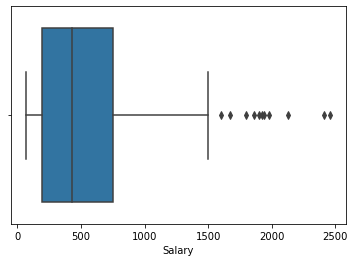

In [49]:
# The process of visualizing the Salary variable with boxplot method was done. We find the outlier observations on the chart.
import seaborn as sns
sns.boxplot(x = df["Salary"]);

In [50]:
df["Salary"].describe()

count     322.000000
mean      529.809193
std       429.681983
min        67.500000
25%       190.000000
50%       430.750000
75%       750.000000
max      2460.000000
Name: Salary, dtype: float64

In [51]:
# First, when the quarters of 1% and 99% were examined, there were no outlier.
# Later when the quarters of 5% and 95% were examined, there were no outlier.
# Finally, when 25% quarters and 75% quarters were examined, outlier observations were found.

for feature in df:

    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3-Q1
    upper = Q3 + 1.5*IQR
    lower = Q1 - 1.5*IQR

    if df[(df[feature] > upper) | (df[feature] < lower)].any(axis=None):
        print(feature,"yes")
        print(df[(df[feature] > upper) | (df[feature] < lower)].shape[0])
    else:
        print(feature, "no")

Years yes
2
CAtBat yes
5
CHits yes
6
CHmRun yes
32
CRuns yes
5
CRBI yes
26
CWalks yes
20
Salary yes
11
OrtCAtBat no
OrtCHits no
OrtCHmRun yes
6
OrtCruns no
OrtCRBI no
OrtCWalks yes
4


In [52]:
#We conduct a stand alone observation review for the salary variable
#We suppress contradictory values
Q1 = df.Salary.quantile(0.25)
Q3 = df.Salary.quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
df.loc[df["Salary"] > upper,"Salary"] = upper

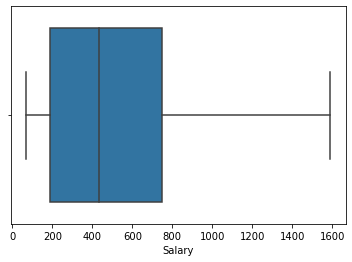

In [53]:
import seaborn as sns
sns.boxplot(x = df["Salary"]);

### 3.1) Local Outlier Factor (LOF)

In [54]:
#We determine outliers between all variables with the LOF method
from sklearn.neighbors import LocalOutlierFactor
lof =LocalOutlierFactor(n_neighbors= 10)
lof.fit_predict(df)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1

In [55]:
df_scores = lof.negative_outlier_factor_
np.sort(df_scores)[0:30]

array([-5.54162663, -4.81973809, -4.62812671, -4.62728308, -4.61787559,
       -4.61613196, -4.55560988, -1.80160101, -1.72009937, -1.66395107,
       -1.58042035, -1.51613115, -1.49327573, -1.49116767, -1.47100199,
       -1.46339584, -1.44804009, -1.42081883, -1.41319949, -1.38592254,
       -1.33683984, -1.32584031, -1.32251276, -1.3224799 , -1.31487229,
       -1.31380446, -1.3073428 , -1.30715075, -1.30192549, -1.2960993 ])

In [56]:
#We choose the threshold value according to lof scores
threshold = np.sort(df_scores)[7]
threshold

-1.8016010062553822

In [57]:
#We delete those that are higher than the threshold
outlier = df_scores > threshold
df = df[outlier]

In [58]:
# The size of the data set was examined.
df.shape

(314, 14)

# 3) Modeling with Nonlinear Regression Models

- **KNN**
- **Support Vector Regression (SVR)**
- **CART**
- **Random Forests (RF)**
- **Gradient Boosting Machines (GBM)**
- **eXtreme Gradient Boosting (XGBoost)**
- **LightGBM**
- **CatBoost**
- **Neural Networks**

Each model can be modeled with the whole data set, but this has a disadvantage. The model will produce bad results in data it has never seen before. By separating the data set as train and test, a model installation process will be performed and error values will be observed. If you want, you can also build models with all data.

## 1) KNN

In [149]:
y = df["Salary"]
X = df.drop("Salary",axis=1)

In [150]:
X.head()

,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,OrtCAtBat,OrtCHits,OrtCHmRun,OrtCruns,OrtCRBI,OrtCWalks
0,1.0,293.0,66.0,1.0,30.0,29.0,14.0,293.000000,66.000000,1.000000,30.000000,29.000000,14.000000
1,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,246.357143,59.642857,4.928571,22.928571,29.571429,26.785714
2,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,541.333333,152.333333,21.000000,74.666667,88.666667,87.666667
3,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,511.636364,143.181818,20.454545,75.272727,76.181818,32.181818
4,2.0,396.0,101.0,12.0,48.0,46.0,33.0,198.000000,50.500000,6.000000,24.000000,23.000000,16.500000


In [151]:
#Feature Selection
#Wrapper Method
#Backward Elimination
#https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b
cols = X.columns

import statsmodels.api as sm
from sklearn.feature_selection import RFE
#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['CRuns', 'CWalks', 'OrtCAtBat', 'OrtCHits', 'OrtCRBI', 'OrtCWalks']


In [152]:
X = df[selected_features_BE]
X.head()

,CRuns,CWalks,OrtCAtBat,OrtCHits,OrtCRBI,OrtCWalks
0,30.0,14.0,293.000000,66.000000,29.000000,14.000000
1,321.0,375.0,246.357143,59.642857,29.571429,26.785714
2,224.0,263.0,541.333333,152.333333,88.666667,87.666667
3,828.0,354.0,511.636364,143.181818,76.181818,32.181818
4,48.0,33.0,198.000000,50.500000,23.000000,16.500000


In [153]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=46)

### 1.1) Model Installation

In [64]:
knn_model = KNeighborsRegressor().fit(X_train, y_train)

### 1.2) Test Error

In [65]:
y_pred = knn_model.predict(X_test)
knn_base = np.sqrt(mean_squared_error(y_test, y_pred))
knn_base

144.2481136326769

### 1.3) Model Tuning

In [66]:
knn_params = {"n_neighbors": np.arange(2,30,1)}

knn_model = KNeighborsRegressor()

knn_cv_model = GridSearchCV(knn_model, knn_params, cv = 10).fit(X_train, y_train)

In [67]:
knn_cv_model.best_params_

{'n_neighbors': 6}

### 1.4) Final Model Installation

In [68]:
knn_tuned = KNeighborsRegressor(**knn_cv_model.best_params_).fit(X_train, y_train)

### 1.5) Final Model Test Error

In [69]:
y_pred = knn_tuned.predict(X_test)
knn_final = np.sqrt(mean_squared_error(y_test, y_pred))
knn_final

144.53422633110452

## 2)SVR

### 2.1) Model Installation

In [70]:
svr_model = SVR().fit(X_train, y_train)

### 2.2) Test Error

In [71]:
y_pred = svr_model.predict(X_test)
svr_base = np.sqrt(mean_squared_error(y_test, y_pred))
svr_base

290.01291439586316

### 2.3) Model Tuning

In [72]:
svr_model = SVR() 

svr_params = {"C": [0.01,0.001, 0.2, 0.1,0.5,0.8,0.9,1, 10, 100, 500,1000]}

svr_cv_model = GridSearchCV(svr_model, svr_params, cv = 10, n_jobs = -1, verbose =  2).fit(X_train, y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    1.6s finished


In [73]:
svr_cv_model.best_params_

{'C': 1000}

### 2.4) Final Model Installation

In [74]:
svr_tuned = SVR(**svr_cv_model.best_params_).fit(X_train, y_train)

### 2.5) Final Model Test Error

In [75]:
y_pred = svr_tuned.predict(X_test)
svr_final = np.sqrt(mean_squared_error(y_test, y_pred))
svr_final

134.02976168002692

## 3) CART

### 3.1) Model Installation

In [76]:
cart_model = DecisionTreeRegressor()
cart_model.fit(X_train, y_train)

DecisionTreeRegressor()

### 3.2) Test Error

In [77]:
y_pred = cart_model.predict(X_test)
cart_base = np.sqrt(mean_squared_error(y_test, y_pred))
cart_base

184.66273911976472

### 3.3) Model Tuning

In [78]:
cart_model = DecisionTreeRegressor()

In [79]:
cart_params = {"max_depth": [2,3,4,5,10,20,100, 1000],
              "min_samples_split": [2,10,5,30,50,10]}

In [80]:
cart_cv_model = GridSearchCV(cart_model, cart_params, cv = 10, n_jobs = -1, verbose =  2).fit(X_train, y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:    0.6s finished


In [81]:
cart_cv_model.best_params_

{'max_depth': 5, 'min_samples_split': 50}

### 3.4) Final Model Installation

In [82]:
cart_tuned = DecisionTreeRegressor(**cart_cv_model.best_params_).fit(X_train, y_train)

### 3.5) Final Model Test Error

In [83]:
y_pred = cart_tuned.predict(X_test)
cart_final = np.sqrt(mean_squared_error(y_test, y_pred))
cart_final

148.38020582922016

## 4) Random Forests

### 4.1) Model Installation 

In [84]:
rf_model = RandomForestRegressor(random_state = 42).fit(X_train, y_train)

### 4.2) Test Error

In [85]:
y_pred = rf_model.predict(X_test)
rf_base = np.sqrt(mean_squared_error(y_test, y_pred))
rf_base

125.26896185555334

### 4.3) Model Tuning

In [86]:
rf_params = {"max_depth": [5,10,None],
            "max_features": [2,5,10],
            "n_estimators": [100, 500, 900],
            "min_samples_split": [2,10,30]}

In [87]:
rf_cv_model = GridSearchCV(rf_model, rf_params, cv = 10, n_jobs = -1, verbose = 2).fit(X_train , y_train)

Fitting 10 folds for each of 81 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   46.1s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed:  3.3min finished


In [88]:
rf_cv_model.best_params_

{'max_depth': 5,
 'max_features': 2,
 'min_samples_split': 2,
 'n_estimators': 900}

### 4.4) Final Model Installation

In [89]:
rf_tuned = RandomForestRegressor(**rf_cv_model.best_params_).fit(X_train, y_train)

### 4.5) Final Model Test Error

In [90]:
y_pred = rf_tuned.predict(X_test)
rf_final = np.sqrt(mean_squared_error(y_test, y_pred))
rf_final

122.1108370641809

In [91]:
rf_tuned.feature_importances_

array([0.28872506, 0.23279499, 0.12323407, 0.16391823, 0.14019943,
       0.05112823])

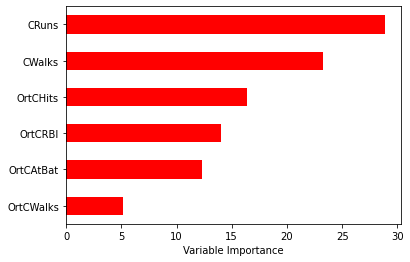

In [92]:
Importance = pd.DataFrame({'Importance':rf_tuned.feature_importances_*100}, 
                          index = ['CRuns', 'CWalks', 'OrtCAtBat', 'OrtCHits', 'OrtCRBI', 'OrtCWalks'])

Importance.sort_values(by = 'Importance', 
                       axis = 0, 
                       ascending = True).plot(kind = 'barh', 
                                              color = 'r', )

plt.xlabel('Variable Importance')
plt.gca().legend_ = None

## 5) GBM

### 5.1) Model Installation

In [154]:
gbm_model = GradientBoostingRegressor().fit(X_train, y_train)

### 5.2) Test Error

In [155]:
y_pred = gbm_model.predict(X_test)
gbm_base = np.sqrt(mean_squared_error(y_test, y_pred))
gbm_base

145.85352925631975

### 5.3) Model Tuning

In [162]:
gbm_params = {"learning_rate": [0.001,0.1,0.01],
             "max_depth": [3,5,8,10],
             "n_estimators": [200,500,1000],
             "subsample": [1,0.5,0.8],
             "loss": ["ls","lad","quantile"]}

In [163]:
gbm_model = GradientBoostingRegressor().fit(X_train, y_train)

In [164]:
gbm_cv_model = GridSearchCV(gbm_model, 
                            gbm_params, 
                            cv = 10, 
                            n_jobs=-1, 
                            verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 324 candidates, totalling 3240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed: 17.2min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 21.4min
[Parallel(n_jobs=-1)]: Done 3240 out of 3240 | elapsed: 30.4min finished


In [165]:
gbm_cv_model.best_params_

{'learning_rate': 0.01,
 'loss': 'lad',
 'max_depth': 5,
 'n_estimators': 500,
 'subsample': 0.5}

### 5.4) Final Model Installation

In [168]:
gbm_tuned = GradientBoostingRegressor(**gbm_cv_model.best_params_).fit(X_train, y_train)

### 5.5) Final Model Test Error

In [169]:
y_pred = gbm_tuned.predict(X_test)
gbm_final = np.sqrt(mean_squared_error(y_test, y_pred))
gbm_final

114.93846803328381

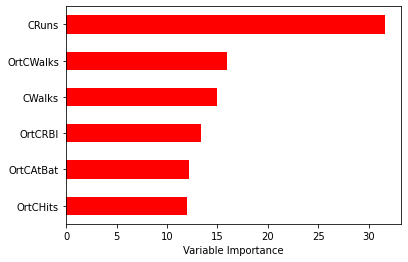

In [101]:
Importance = pd.DataFrame({'Importance':gbm_tuned.feature_importances_*100}, 
                          index = ['CRuns', 'CWalks', 'OrtCAtBat', 'OrtCHits', 'OrtCRBI', 'OrtCWalks'])

Importance.sort_values(by = 'Importance', 
                       axis = 0, 
                       ascending = True).plot(kind = 'barh', 
                                              color = 'r', )

plt.xlabel('Variable Importance')
plt.gca().legend_ = None

## 6) XGBoost

In [102]:
import xgboost
from xgboost import XGBRegressor

### 6.1) Model Installation

In [103]:
xgb = XGBRegressor().fit(X_train, y_train)

### 6.2) Test Error

In [104]:
y_pred = xgb.predict(X_test)
xgb_base = np.sqrt(mean_squared_error(y_test, y_pred))
xgb_base

135.60938284304453

### 6.3) Model Tuning

In [105]:
xgb_params = {"learning_rate": [0.1,0.01,1],
             "max_depth": [2,5,8],
             "n_estimators": [100,500,1000],
             "colsample_bytree": [0.3,0.6,1]}

In [106]:
xgb_cv_model  = GridSearchCV(xgb,xgb_params, cv = 10, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 81 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 508 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed:   30.9s finished


In [107]:
xgb_cv_model.best_params_

{'colsample_bytree': 1,
 'learning_rate': 0.01,
 'max_depth': 2,
 'n_estimators': 500}

### 6.4) Final Model Installation

In [108]:
xgb_tuned = XGBRegressor(**xgb_cv_model.best_params_).fit(X_train, y_train)

### 6.5) Final Model Test Error

In [109]:
y_pred = xgb_tuned.predict(X_test)
xgb_final = np.sqrt(mean_squared_error(y_test, y_pred))
xgb_final

125.12258371475984

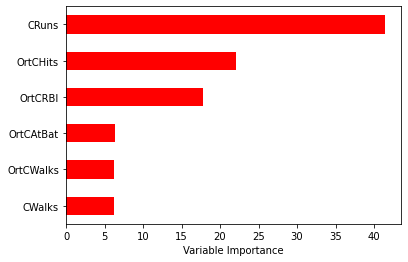

In [110]:
Importance = pd.DataFrame({'Importance':xgb_tuned.feature_importances_*100}, 
                          index = ['CRuns', 'CWalks', 'OrtCAtBat', 'OrtCHits', 'OrtCRBI', 'OrtCWalks'])

Importance.sort_values(by = 'Importance', 
                       axis = 0, 
                       ascending = True).plot(kind = 'barh', 
                                              color = 'r', )

plt.xlabel('Variable Importance')
plt.gca().legend_ = None

## 7) LightGBM

In [111]:
from lightgbm import LGBMRegressor

### 7.1) Model Installation

In [112]:
lgb_model = LGBMRegressor().fit(X_train, y_train)

### 7.2) Test Error

In [113]:
y_pred = lgb_model.predict(X_test)
lbg_base = np.sqrt(mean_squared_error(y_test, y_pred))
lbg_base

139.64470935637962

### 7.3) Model Tuning

In [114]:
lgb_model = LGBMRegressor()

In [115]:
lgbm_params = {"learning_rate": [0.01, 0.1, 1],
              "n_estimators": [200,1000,10000],
              "max_depth": [2,5,10],
              "colsample_bytree": [1,0.5,0.3]}

In [116]:
lgbm_cv_model = GridSearchCV(lgb_model, 
                             lgbm_params, 
                             cv = 10, 
                             n_jobs = -1, 
                             verbose =2).fit(X_train, y_train)

Fitting 10 folds for each of 81 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 170 tasks      | elapsed:   40.3s
[Parallel(n_jobs=-1)]: Done 373 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 656 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed:  3.2min finished


In [117]:
lgbm_cv_model.best_params_

{'colsample_bytree': 1,
 'learning_rate': 0.01,
 'max_depth': 5,
 'n_estimators': 200}

### 7.4) Final Model Installation

In [118]:
lgbm_tuned = LGBMRegressor(**lgbm_cv_model.best_params_).fit(X_train, y_train)

### 7.5) Final Model Test Error

In [119]:
y_pred = lgbm_tuned.predict(X_test)
lbg_final = np.sqrt(mean_squared_error(y_test, y_pred))
lbg_final

121.81670906677196

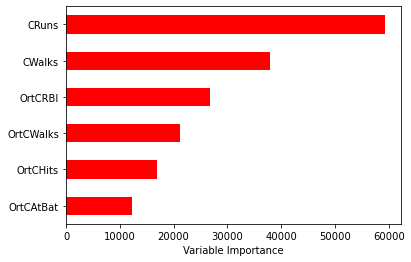

In [120]:
Importance = pd.DataFrame({'Importance':lgbm_tuned.feature_importances_*100}, 
                          index = ['CRuns', 'CWalks', 'OrtCAtBat', 'OrtCHits', 'OrtCRBI', 'OrtCWalks'])

Importance.sort_values(by = 'Importance', 
                       axis = 0, 
                       ascending = True).plot(kind = 'barh', 
                                              color = 'r', )

plt.xlabel('Variable Importance')
plt.gca().legend_ = None

## 8) CatBoost

In [121]:
from catboost import CatBoostRegressor

### 8.1) Model Installation

In [122]:
catb_model = CatBoostRegressor(verbose = False).fit(X_train, y_train)

### 8.2) Test Error

In [123]:
y_pred = catb_model.predict(X_test)
cat_base = np.sqrt(mean_squared_error(y_test, y_pred))
cat_base

130.40882937355306

### 8.3) Model Tuning

In [124]:
catb_params = {"iterations": [500,1000,10000],
              "learning_rate": [0.01,0.1,1],
              "depth": [2,6,10]}

In [125]:
catb_model = CatBoostRegressor()

In [126]:
catb_cv_model = GridSearchCV(catb_model, 
                           catb_params, 
                           cv = 5, 
                           n_jobs = -1, 
                           verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed: 23.5min finished


0:	learn: 376.2421417	total: 31.9ms	remaining: 15.9s
1:	learn: 358.7310913	total: 49.8ms	remaining: 12.4s
2:	learn: 341.9548442	total: 66.8ms	remaining: 11.1s
3:	learn: 326.5407673	total: 82.9ms	remaining: 10.3s
4:	learn: 312.1424757	total: 94.2ms	remaining: 9.32s
5:	learn: 299.8744010	total: 106ms	remaining: 8.69s
6:	learn: 289.1460779	total: 116ms	remaining: 8.15s
7:	learn: 279.3035420	total: 125ms	remaining: 7.7s
8:	learn: 269.0798997	total: 134ms	remaining: 7.32s
9:	learn: 260.1915025	total: 145ms	remaining: 7.11s
10:	learn: 251.6088730	total: 155ms	remaining: 6.9s
11:	learn: 244.3510282	total: 165ms	remaining: 6.69s
12:	learn: 236.4782672	total: 174ms	remaining: 6.51s
13:	learn: 229.8707437	total: 187ms	remaining: 6.5s
14:	learn: 223.2277350	total: 198ms	remaining: 6.4s
15:	learn: 217.5695223	total: 207ms	remaining: 6.26s
16:	learn: 211.6290598	total: 217ms	remaining: 6.17s
17:	learn: 206.0440874	total: 228ms	remaining: 6.1s
18:	learn: 201.4040461	total: 238ms	remaining: 6.04s
19:

In [127]:
catb_cv_model.best_params_

{'depth': 10, 'iterations': 500, 'learning_rate': 0.1}

### 8.4) Final Model Installation

In [128]:
catb_tuned = CatBoostRegressor(**catb_cv_model.best_params_, verbose = False).fit(X_train, y_train)

### 8.5) Final Model Test Error

In [129]:
y_pred = catb_tuned.predict(X_test)
cat_final = np.sqrt(mean_squared_error(y_test, y_pred))
cat_final

128.73249780821817

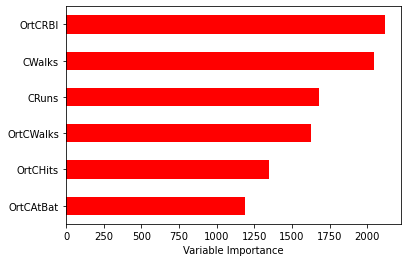

In [130]:
Importance = pd.DataFrame({'Importance':catb_tuned.feature_importances_*100}, 
                          index = ['CRuns', 'CWalks', 'OrtCAtBat', 'OrtCHits', 'OrtCRBI', 'OrtCWalks'])

Importance.sort_values(by = 'Importance', 
                       axis = 0, 
                       ascending = True).plot(kind = 'barh', 
                                              color = 'r', )

plt.xlabel('Variable Importance')
plt.gca().legend_ = None

## 9) Neural Networks

### 9.1) Model Installation

In [131]:
scaler = StandardScaler()

In [132]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [133]:
scaler.fit(X_test)
X_test_scaled = scaler.transform(X_test)

In [134]:
mlp_model = MLPRegressor().fit(X_train_scaled, y_train)

### 9.2) Test Error

In [135]:
y_pred = mlp_model.predict(X_test_scaled)
neural_base = np.sqrt(mean_squared_error(y_test, y_pred))
neural_base

485.02268574643244

### 9.3) Model Tuning

In [136]:
mlp_params = {"alpha": [0.1, 0.01, 0.02, 0.001, 0.0001], 
             "hidden_layer_sizes": [(10,20), (5,5), (100,100), (1000,100,10)]}

In [137]:
mlp_cv_model = GridSearchCV(mlp_model, mlp_params, cv = 10, verbose = 2, n_jobs = -1).fit(X_train_scaled, y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   56.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  1.3min finished


In [138]:
mlp_cv_model.best_params_

{'alpha': 0.1, 'hidden_layer_sizes': (1000, 100, 10)}

### 9.4) Final Model Installation

In [139]:
mlp_tuned = MLPRegressor(**mlp_cv_model.best_params_).fit(X_train_scaled, y_train)

### 9.5) Final Model Test Error

In [140]:
y_pred = mlp_tuned.predict(X_test)
neural_final = np.sqrt(mean_squared_error(y_test, y_pred))
neural_final

183.3134232096891

# 4) Comparison Of Models

In [170]:
 models = [
    knn_tuned,
    svr_tuned,
    cart_tuned,
    rf_tuned,
    gbm_tuned,
    xgb_tuned,
    lgbm_tuned,
    catb_tuned,
    mlp_tuned]


for model in models:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    error = np.sqrt(mean_squared_error(y_test, y_pred))
    print("-"*28)
    print(isimler + ":" )
    print("Error:" + str(error))

----------------------------
KNeighborsRegressor:
Error:144.53422633110452
----------------------------
SVR:
Error:134.02976168002692
----------------------------
DecisionTreeRegressor:
Error:148.38020582922016
----------------------------
RandomForestRegressor:
Error:122.1108370641809
----------------------------
GradientBoostingRegressor:
Error:114.93846803328381
----------------------------
XGBRegressor:
Error:125.12258371475984
----------------------------
LGBMRegressor:
Error:121.81670906677196
----------------------------
CatBoostRegressor:
Error:128.73249780821817
----------------------------
MLPRegressor:
Error:183.3134232096891


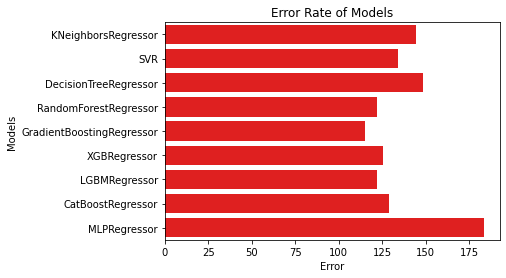

In [171]:
sonuc = []

sonuclar = pd.DataFrame(columns= ["Models","Error"])

for model in models:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    hata = np.sqrt(mean_squared_error(y_test, y_pred))    
    sonuc = pd.DataFrame([[isimler, hata]], columns= ["Models","Error"])
    sonuclar = sonuclar.append(sonuc)
    
    
sns.barplot(x= 'Error', y = 'Models', data=sonuclar, color="r")
plt.xlabel('Error')
plt.title('Error Rate of Models');  

In [172]:
sonuclar_df = pd.DataFrame({"Base Model Test Error":[knn_base, svr_base, cart_base,rf_base, gbm_base, xgb_base, lbg_base, cat_base, neural_base],
                            "Test Tuned Error":[knn_final, svr_final, cart_final, rf_final,gbm_final, xgb_final, lbg_final, cat_final, neural_final]})
sonuclar_df.index= ["KNN", "SVR","CART","Random Forests","GBM","XGBoost", "LightGBM", "CatBoost", "Neural Networks"]

In [173]:
sonuclar_df

,Base Model Test Error,Test Tuned Error
KNN,144.248114,144.534226
SVR,290.012914,134.029762
CART,184.662739,148.380206
Random Forests,125.268962,122.110837
GBM,145.853529,114.938468
XGBoost,135.609383,125.122584
LightGBM,139.644709,121.816709
CatBoost,130.408829,128.732498
Neural Networks,485.022686,183.313423


# 5) Reporting

The goal in this study was to establish nonlinear regression models for the hitters data set and examine and minimize error scores on 9 models. The works performed are as follows:

#### **1).** Hitters Data Set read.
#### **2).** With Exploratory Data Analysis;
* the data set's structural data were checked.
* The types of variables in the dataset were examined.
* Size information of the dataset was accessed.
* How many missing observations were obtained from which variable in the data set. Only the dependent variable "Salary" was observed to have 59 missing observations.
* Descriptive statistics of the data set were examined.

#### **3).** Data Preprocessing section; 
* **df for:**The NA values were filled with the KNN algorithm, the Outliers were determined by LOF and dropped. The X variables were normalized.

#### **4).** During Model Building;

KNN, SVR, CART, Random Forests, GBM, XGBoost, LightGBM, CatBoost, Neural Networks using machine learning models, **RMSE** values representing the difference between real values and predicted values were calculated. Later KNN, SVR, CART, Random Forests, GBM, XGBoost, LightGBM, CatBoost, Neural Networks hyperparameter optimizations were applied to further reduce the error value.

#### **5).** Result;

The model created as a result of GBM Hyperparameter optimization became the model with the lowest RMSE value. (114)**